<a href="https://colab.research.google.com/github/anishdass/OccupancyDetection/blob/main/OccupancyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data present in directory: C:\Users\Anish\Downloads\occupancy_data

#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
train=pd.read_csv('datatraining.txt')
test1=pd.read_csv('datatest.txt')
test2=pd.read_csv('datatest2.txt')

#Preprocessing

##Data

In [4]:
train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
test1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [6]:
test2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


##Data Describe

In [7]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [8]:
test1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [9]:
test2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [10]:
train=train.reset_index()
test1=test1.reset_index()
test2=test2.reset_index()

In [11]:
train=train.iloc[:, 1:]
test1=test1.iloc[:, 1:]
test2=test2.iloc[:, 1:]

##Nulls

In [12]:
train.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [13]:
test1.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [14]:
test2.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

##Visualization

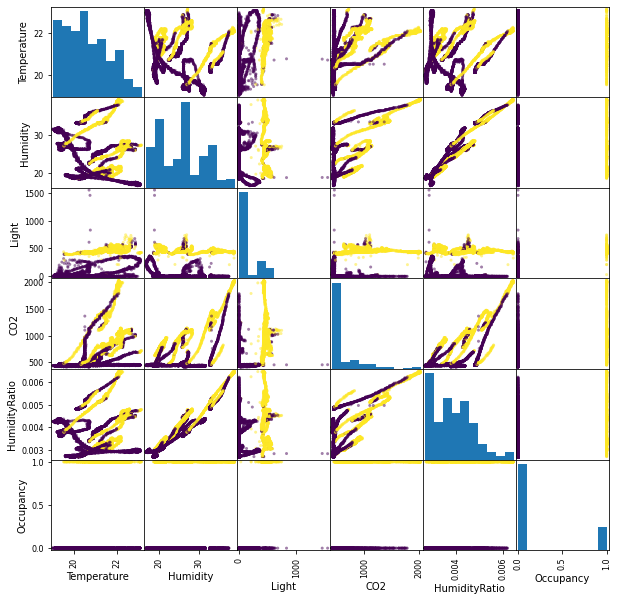

In [15]:
pd.plotting.scatter_matrix(train, c=train.Occupancy, figsize=[10, 10])
plt.show()

#Processing

##Changing the format of the date

In [16]:
def convert_dates(data):
  for i, date in enumerate(data.date):
    data.iloc[i, data.columns.get_loc('date')] = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

convert_dates(train)
convert_dates(test1)
convert_dates(test2)

##Plotting every feature using time series

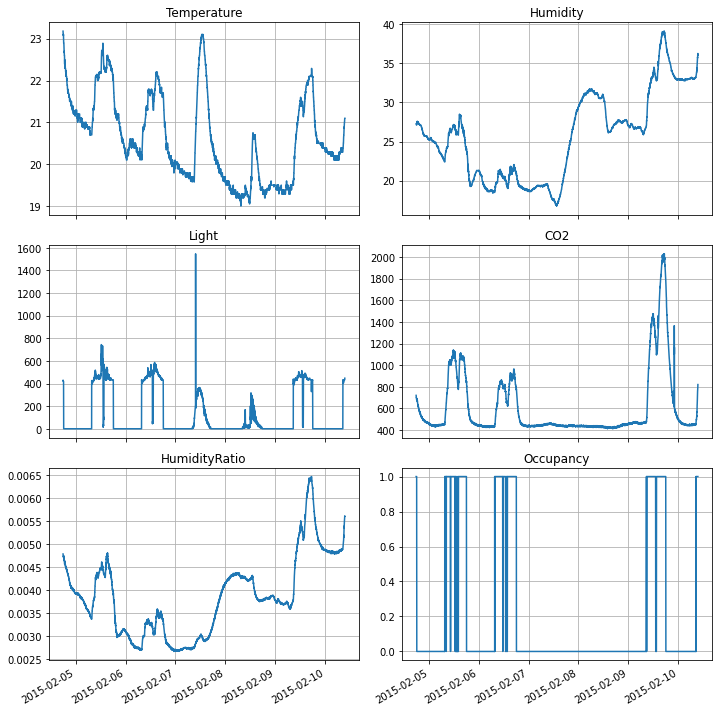

In [17]:
for i, col in enumerate(train.columns.values[1:]):
  plt.subplot(3, 2, i+1)
  plt.plot(train.date.values.tolist(), train[col].values.tolist())
  plt.title(col)
  fig,ax=plt.gcf(), plt.gca()
  ax.xaxis_date()
  fig.autofmt_xdate()
  fig.set_size_inches(10, 10)
  plt.tight_layout()
  plt.grid(True)
plt.show()

##Analysing Occupancy

In [18]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seventh_feb=datetime.strptime('2015-02-07', '%Y-%m-%d')
print(days[seventh_feb.weekday()])

Saturday


##Find which date has how many entries

In [19]:
date_list=train.date.values.tolist()
day_start_indices=[0]
for i in range(5,11):
  day_start_indices.append(
      date_list.index(
          datetime.strptime(
              '2015-02-'+str(i)+' 00:00:00',
              '%Y-%m-%d %H:%M:%S'
          )
      )
  )
print(day_start_indices)

[0, 369, 1809, 3249, 4689, 6129, 7569]


In [20]:
##From above we can say that Feb 4 has 368 entries and Feb 5 has 369 to 1808 entries and so on..

##Plotting occupancy in time series

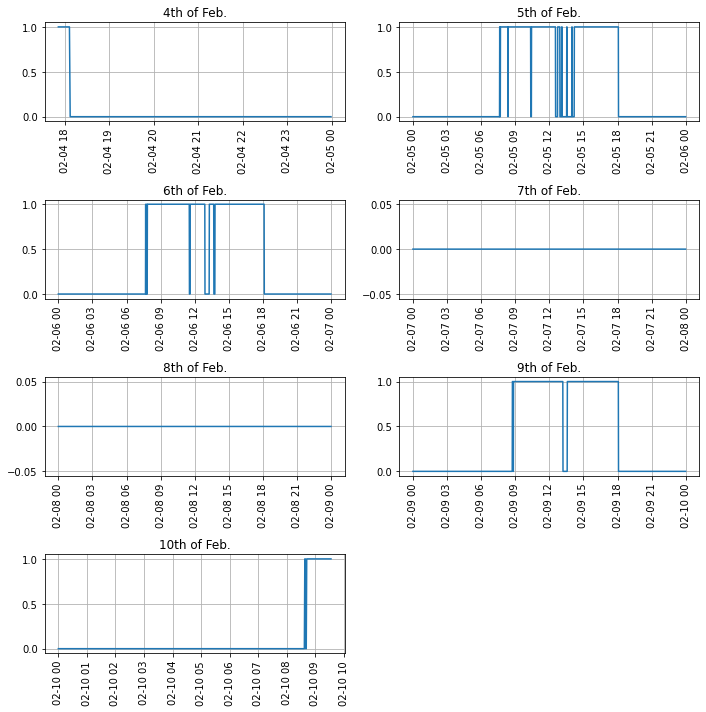

In [21]:
for i in range(len(day_start_indices)):    
    plt.subplot(4, 2, i + 1)
    if i != len(day_start_indices) - 1:
        plt.plot(
            date_list[day_start_indices[i]:day_start_indices[i+1]],
            train['Occupancy'].values.tolist()[
                day_start_indices[i]:day_start_indices[i+1]])
    else:
        plt.plot(
            date_list[day_start_indices[i]:],
            train['Occupancy'].values.tolist()[day_start_indices[i]:])
    plt.title(str(i + 4) + 'th of Feb.')
    plt.grid(True)
    plt.xticks(rotation=90)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.set_size_inches(10, 10)
    fig.tight_layout()
plt.show()

##Figuring the daily occupancy

In [22]:
print('Daily working hours')
print('------------------------------------')
print()
for i in range(len(day_start_indices)-1):
  try:
    print('Start:\t',
    train.loc[(train.date>date_list[day_start_indices[i]])&
          (train.date<date_list[day_start_indices[i+1]])&
          (train.Occupancy==1), 'date'].iloc[0])
    print('End:\t',
    train.loc[(train.date>date_list[day_start_indices[i]])&
          (train.date<date_list[day_start_indices[i+1]])&
          (train.Occupancy==1), 'date'].iloc[-1])
  except:
    print('No Occupancy')
  print('####################')
  print()

Daily working hours
------------------------------------

Start:	 2015-02-04 17:51:59
End:	 2015-02-04 18:06:00
####################

Start:	 2015-02-05 07:38:00
End:	 2015-02-05 18:04:00
####################

Start:	 2015-02-06 07:40:59
End:	 2015-02-06 18:06:00
####################

No Occupancy
####################

No Occupancy
####################

Start:	 2015-02-09 08:44:59
End:	 2015-02-09 18:04:00
####################



##Adding features 'Weekend' and 'Working hour'

In [23]:
def add_features(df):
  df['Weekend']=0
  df['Working Hour']=0

  for i, date in enumerate(df.date):
    if ((days[date.weekday()]=='Saturday') or (days[date.weekday()]=='Sunday')):
      df.iloc[i, df.columns.get_loc('Weekend')] = 1
    if ((date.time()>=datetime.strptime('07:30', '%H:%M').time()) and (date.time()<=datetime.strptime('18:00', '%H:%M').time())):
      df.iloc[i, df.columns.get_loc('Working Hour')] = 1

In [24]:
add_features(train)
add_features(test1)
add_features(test2)

In [25]:
train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Weekend,Working Hour
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,0,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,0,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,0,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,0,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,0,1


##Plotting scatter matrix.

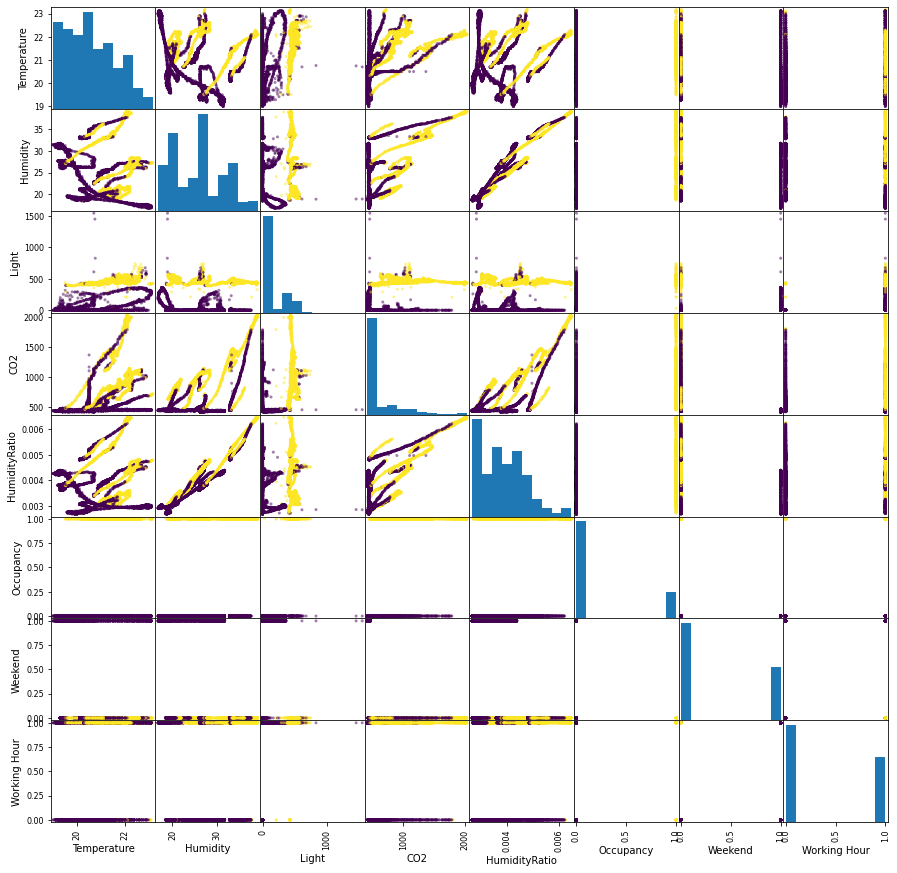

In [26]:
pd.plotting.scatter_matrix(train, c=train.Occupancy, figsize=[15,15])
plt.show()

# Modelling, Training, Testing

##Splitting into train and test data

In [27]:
X_train=train.drop(columns=['Occupancy'])
y_train=train['Occupancy']

X_test1=test1.drop(columns=['Occupancy'])
y_test1=test1['Occupancy']

X_test2=test2.drop(columns=['Occupancy'])
y_test2=test2['Occupancy']

In [28]:
feature_combo_list=[
                   ('Weekend','Working Hour'),
                   ('Light', 'CO2'),
                   ('Working Hour', 'CO2'),
                   ('CO2', 'Temperature'),
                   ('Weekend', 'Working Hour', 'Light', 'CO2'),
                   ('Weekend', 'HumidityRatio'),
]

##Model 1: Logistic regression

In [29]:
hyper_params = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1, 1.2, 1.5],
        'random_state': [0]
    },
]

for features in feature_combo_list:
  print(features)
  print('==============================')
  X = X_train.loc[:, features]
  X_t1 = X_test1.loc[:, features]
  X_t2 = X_test2.loc[:, features]

  logit=GridSearchCV(LogisticRegression(), hyper_params, scoring='accuracy')
  logit.fit(X, y_train)

  print('Best parameters set: ')
  print(logit.best_params_)
  print()

  preds=[(logit.predict(X), y_train, 'Train'),
         (logit.predict(X_t1), y_test1, 'Test1'),
         (logit.predict(X_t2), y_test2, 'Test2')
         ]
  for pred in preds:
    print(pred[2]+' Classification report')
    print()
    print(classification_report(pred[1], pred[0]))
    print()
    print(pred[2]+' Confusion matrix')
    print()
    print(confusion_matrix(pred[1], pred[0]))
    print()

('Weekend', 'Working Hour')


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


Best parameters set: 
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification report

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion matrix

[[6096  318]
 [  20 1709]]

Test1 Classification report

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion matrix

[[1602   91]
 [  16  956]]

Test2 Classification report

              precision    recall  f1-score   support

           0       0.99      0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


Best parameters set: 
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.95      1.00      0.97      1729

    accuracy                           0.99      8143
   macro avg       0.97      0.99      0.98      8143
weighted avg       0.99      0.99      0.99      8143


Train Confusion matrix

[[6325   89]
 [   6 1723]]

Test1 Classification report

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665


Test1 Confusion matrix

[[1638   55]
 [   3  969]]

Test2 Classification report

              precision    recall  f1-score   support

           0       1.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


Best parameters set: 
{'C': 1.2, 'penalty': 'l2', 'random_state': 0}

Train Classification report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6414
           1       0.91      0.86      0.88      1729

    accuracy                           0.95      8143
   macro avg       0.93      0.92      0.93      8143
weighted avg       0.95      0.95      0.95      8143


Train Confusion matrix

[[6262  152]
 [ 247 1482]]

Test1 Classification report

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1693
           1       0.93      0.89      0.91       972

    accuracy                           0.93      2665
   macro avg       0.93      0.92      0.93      2665
weighted avg       0.93      0.93      0.93      2665


Test1 Confusion matrix

[[1625   68]
 [ 109  863]]

Test2 Classification report

              precision    recall  f1-score   support

           0       0.92     

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


Best parameters set: 
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification report

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6414
           1       0.83      0.73      0.78      1729

    accuracy                           0.91      8143
   macro avg       0.88      0.84      0.86      8143
weighted avg       0.91      0.91      0.91      8143


Train Confusion matrix

[[6148  266]
 [ 465 1264]]

Test1 Classification report

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1693
           1       0.83      0.81      0.82       972

    accuracy                           0.87      2665
   macro avg       0.86      0.86      0.86      2665
weighted avg       0.87      0.87      0.87      2665


Test1 Confusion matrix

[[1537  156]
 [ 183  789]]

Test2 Classification report

              precision    recall  f1-score   support

           0       0.92      0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


Best parameters set: 
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.95      1.00      0.97      1729

    accuracy                           0.99      8143
   macro avg       0.98      0.99      0.98      8143
weighted avg       0.99      0.99      0.99      8143


Train Confusion matrix

[[6325   89]
 [   4 1725]]

Test1 Classification report

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665


Test1 Confusion matrix

[[1637   56]
 [   3  969]]

Test2 Classification report

              precision    recall  f1-score   support

           0       1.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

Best parameters set: 
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification report

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6414
           1       0.00      0.00      0.00      1729

    accuracy                           0.79      8143
   macro avg       0.39      0.50      0.44      8143
weighted avg       0.62      0.79      0.69      8143


Train Confusion matrix

[[6414    0]
 [1729    0]]

Test1 Classification report

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1693
           1       0.00      0.00      0.00       972

    accuracy                           0.64      2665
   macro avg       0.32      0.50      0.39      2665
weighted avg       0.40      0.64      0.49      2665


Test1 Confusion matrix

[[1693    0]
 [ 972    0]]

Test2 Classification report

              precision    recall  f1-score   support

           0       0.79      1

##Conclusion: Model 1

In [30]:
# If you tabulate the entire accuracy for train, test1 and test2, for different combinations of features, We can
# observe that Light-CO2 and Weekend-Working hour-Light-CO2 gives the best accuracy, Butthere is a high chance
# that the model is overfitted since the accuracy is too high.

##Model 2: Naive Bayes

In [31]:
for feature in feature_combo_list:
  print(features)
  print('=============================')
  X=X_train.loc[:, features]
  X_t1=X_test1.loc[:, features]
  X_t2=X_test2.loc[:, features]

  nb=GaussianNB();
  nb.fit(X, y_train)

  preds=[
         (nb.predict(X), y_train, 'Train'),
         (nb.predict(X_t1), y_test1, 'Test1'),
         (nb.predict(X_t2), y_test2, 'Test2')
  ]
  for pred in preds:
    print(pred[2], ':', end=' ')
    print(str((X.shape[0]-(pred[0]!=pred[1]).sum())/X.shape[0]))
  print()

('Weekend', 'HumidityRatio')
Train : 0.5660076139015106
Test1 : 0.792091366818126
Test2 : 0.4077121454009579

('Weekend', 'HumidityRatio')
Train : 0.5660076139015106
Test1 : 0.792091366818126
Test2 : 0.4077121454009579

('Weekend', 'HumidityRatio')
Train : 0.5660076139015106
Test1 : 0.792091366818126
Test2 : 0.4077121454009579

('Weekend', 'HumidityRatio')
Train : 0.5660076139015106
Test1 : 0.792091366818126
Test2 : 0.4077121454009579

('Weekend', 'HumidityRatio')
Train : 0.5660076139015106
Test1 : 0.792091366818126
Test2 : 0.4077121454009579

('Weekend', 'HumidityRatio')
Train : 0.5660076139015106
Test1 : 0.792091366818126
Test2 : 0.4077121454009579



##Conclusion: Model 2

In [32]:
# Everything seems to be underfitted.

##Model 3: KNN

In [33]:
hyper_params=[
              {
                  'n_neighbors':np.arange(1, 50),
              },
]
for features in feature_combo_list:
  print(features)
  print('==============')
  X=X_train.loc[:, features]
  X_t1=X_test1.loc[:, features]
  X_t2=X_test2.loc[:, features]

  knn=GridSearchCV(KNeighborsClassifier(), hyper_params, scoring='accuracy')
  knn.fit(X, y_train)

  print('Best parameters set')
  print(knn.best_params_)
  print()

  preds=[
        (knn.predict(X), y_train, 'Train'),
        (knn.predict(X_t1), y_test1, 'Test1'),
        (knn.predict(X_t2), y_test2, 'Test2')
  ]

  for pred in preds:
    print(pred[2]+' Classification Report:')
    print()
    print(classification_report(pred[1], pred[0]))
    print()
    print(pred[2]+' Confusion Matrix')
    print()
    print(confusion_matrix(pred[1], pred[0]))
    print()

('Weekend', 'Working Hour')
Best parameters set
{'n_neighbors': 1}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix

[[6096  318]
 [  20 1709]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix

[[1602   91]
 [  16  956]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       0.99    

In [34]:
for pred in preds:
    print(pred[2]+' Classification Report:')
    print()
    print(classification_report(pred[1], pred[0]))
    print()
    print(pred[2]+' Confusion Matrix')
    print()
    print(confusion_matrix(pred[1], pred[0]))
    print()

Train Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6414
           1       0.72      0.72      0.72      1729

    accuracy                           0.88      8143
   macro avg       0.82      0.82      0.82      8143
weighted avg       0.88      0.88      0.88      8143


Train Confusion Matrix

[[5934  480]
 [ 484 1245]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.54      0.61      1693
           1       0.42      0.57      0.48       972

    accuracy                           0.55      2665
   macro avg       0.55      0.56      0.54      2665
weighted avg       0.59      0.55      0.56      2665


Test1 Confusion Matrix

[[915 778]
 [414 558]]

Test2 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      7703
           1       0.31      0.50      0.38  

##Conclusion: Model 3

In [35]:
#Neither overfitting nor underfitting

##Model 4: Decision Tree

In [36]:
hyper_params=[
              {
                  'max_depth':np.arange(1, 1000),
                  'min_samples_split':np.arange(2,5),
                  'random_state':[0]
              },
]

for features in feature_combo_list:
  print(features)
  print("-------------")
  X=X_train.loc[:, features]
  X_t1=X_test1.loc[:, features]
  X_t2=X_test2.loc[:, features]

  tree=GridSearchCV(DecisionTreeClassifier(), hyper_params, scoring='accuracy')
  tree.fit(X, y_train)

  print('Best parameters set:')
  print(tree.best_params_)
  print()

  preds=[
         (tree.predict(X), y_train, 'Train'),
         (tree.predict(X_t1), y_test1, 'Test1'),
         (tree.predict(X_t2), y_test2, 'Test2')
  ]

  for pred in preds:
    print(pred[2], 'Classification report:')
    print()
    print(classification_report(pred[1], pred[0]))
    print()
    print(pred[2], 'Confusion Matrix')
    print(confusion_matrix(pred[1], pred[0]))
    print()

('Weekend', 'Working Hour')
-------------
Best parameters set:
{'max_depth': 2, 'min_samples_split': 2, 'random_state': 0}

Train Classification report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6414
           1       0.84      0.99      0.91      1729

    accuracy                           0.96      8143
   macro avg       0.92      0.97      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion Matrix
[[6096  318]
 [  20 1709]]

Test1 Classification report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.91      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.95      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix
[[1602   91]
 [  16  956]]

Test2 Classification report:

              precision    r

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Conclusion: Model 4

In [37]:
#The accuracies are fluctuating, Hence cannot determine it is underfit or overfit.

##Model 4: Random Forest

In [38]:
hyper_params=[
              {
                  'max_depth':np.arange(1, 100),
                  'min_samples_split':np.arange(2,5),
                  'random_state':[0],
                  'n_estimators':np.arange(10, 20)
              },
]

for features in feature_combo_list:
  print(features)
  print('=====================')
  X=X_train.loc[:, features]
  X_t1=X_test1.loc[:, features]
  X_t2=X_test2.loc[:, features]

  tree=GridSearchCV(RandomForestClassifier(), hyper_params, scoring='accuracy')
  tree.fit(X, y_train)

  print('Best parameters set: ')
  print(tree.best_params_)
  print()

  preds=[
         (tree.predict(X),y_train, 'Train'),
         (tree.predict(X_t1),y_test1, 'Test1'),
         (tree.predict(X_t2),y_test2, 'Test2')
  ]

  for pred in preds:
    print(pred[2]+' Classification report')
    print()
    print(classification_report(pred[0], pred[1]))
    print()
    print(pred[2]+' Confusion matrix:')
    print(confusion_matrix(pred[0], pred[1]))
    print()

('Weekend', 'Working Hour')
Best parameters set: 
{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 0}

Train Classification report

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6116
           1       0.99      0.84      0.91      2027

    accuracy                           0.96      8143
   macro avg       0.97      0.92      0.94      8143
weighted avg       0.96      0.96      0.96      8143


Train Confusion matrix:
[[6096   20]
 [ 318 1709]]

Test1 Classification report

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1618
           1       0.98      0.91      0.95      1047

    accuracy                           0.96      2665
   macro avg       0.96      0.95      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion matrix:
[[1602   16]
 [  91  956]]

Test2 Classification report

              precisio

In [39]:
# Almost same as decision tree